# Fashion MNIST

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime

%matplotlib inline

In [33]:
data_train = pd.read_csv('fashion-mnist_train.csv')
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data_test = pd.read_csv('fashion-mnist_test.csv')
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y = data_train.label
X = data_train[data_train.columns[1:]]

y_test = data_test.label
X_test = data_test[data_test.columns[1:]]

In [36]:
num_classes = 10
epochs = 10

In [37]:
X = X/255
X_test = X_test/255

y = tf.keras.utils.to_categorical(y, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

## 1. Логистическая регрессия

In [39]:
log_reg = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (784,)),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])
log_reg.compile(
    loss = 'categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

log_reg_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'log_reg'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_reg_dir, histogram_freq=1)

In [40]:
log_reg.fit(
    X_train,y_train,
    epochs=epochs,
    validation_data=(X_val,y_val),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8784 - accuracy: 0.7156 - val_loss: 0.6618 - val_accuracy: 0.7854
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6208 - accuracy: 0.7975 - val_loss: 0.5818 - val_accuracy: 0.8122
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5658 - accuracy: 0.8147 - val_loss: 0.5452 - val_accuracy: 0.8201
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5364 - accuracy: 0.8215 - val_loss: 0.5238 - val_accuracy: 0.8278
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5174 - accuracy: 0.8275 - val_loss: 0.5070 - val_accuracy: 0.8326
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5034 - accuracy: 0.8304 - val_loss: 0.4975 - val_accuracy: 0.8341
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4927 - accuracy: 0.8333 - val_loss: 0.4883 - val_accuracy:

Видна зависимость, что с повышением количества эпох увеличивается и точность 

In [41]:
loss,accuracy = log_reg.evaluate(X_test,y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.4739 - accuracy: 0.8442
Test loss: 0.4738720655441284
Test accuracy: 0.8442000150680542


## 2. Полносвязная нейронная сеть

In [42]:
full_nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape = (784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])
full_nn.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

full_nn_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'full_nn'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=full_nn_dir, histogram_freq=1)

In [43]:
full_nn.fit(
    X_train,y_train,
    epochs=epochs,
    validation_data=(X_val,y_val),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.5350 - accuracy: 0.8063 - val_loss: 0.4072 - val_accuracy: 0.8489
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.4089 - accuracy: 0.8503 - val_loss: 0.3644 - val_accuracy: 0.8668
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3794 - accuracy: 0.8608 - val_loss: 0.3479 - val_accuracy: 0.8726
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3585 - accuracy: 0.8699 - val_loss: 0.3424 - val_accuracy: 0.8777
Epoch 5/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3389 - accuracy: 0.8753 - val_loss: 0.3445 - val_accuracy: 0.8777
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3245 - accuracy: 0.8804 - val_loss: 0.3243 - val_accuracy: 0.8818
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3171 - accuracy: 0.8827 - val_loss: 0.3290 - val

In [44]:
loss,accuracy = full_nn.evaluate(X_test,y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3390 - accuracy: 0.8852
Test loss: 0.3389517068862915
Test accuracy: 0.885200023651123


Точность возросла и видно что можно проходить меньшее количество эпох так как точность не сильно изменяется.

## 3. Сверточная нейронная сеть

In [45]:
X_train_ = X_train.to_numpy().reshape(-1,28,28)
X_val_ = X_val.to_numpy().reshape(-1,28,28)
X_test_ = X_test.to_numpy().reshape(-1,28,28)

In [46]:
sv_nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(2,padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])
sv_nn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 28, 28, 32)        64        
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dropout_8 (Dropout)         (None, 5408)              0         
                                                                 
 dense_18 (Dense)            (None, 10)                54090     
                                                      

In [47]:
sv_nn.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)
sv_nn_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'sv_nn'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=sv_nn_dir, histogram_freq=1)

In [48]:
sv_nn.fit(
    X_train_,y_train,
    batch_size=64,
    epochs=epochs,
    validation_data=(X_val_,y_val),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
750/750 [==============================] - 66s 87ms/step - loss: 0.4933 - accuracy: 0.8262 - val_loss: 0.3497 - val_accuracy: 0.8792
Epoch 2/10
750/750 [==============================] - 64s 86ms/step - loss: 0.3422 - accuracy: 0.8799 - val_loss: 0.3191 - val_accuracy: 0.8873
Epoch 3/10
750/750 [==============================] - 64s 85ms/step - loss: 0.3057 - accuracy: 0.8909 - val_loss: 0.3004 - val_accuracy: 0.8933
Epoch 4/10
750/750 [==============================] - 64s 85ms/step - loss: 0.2836 - accuracy: 0.8988 - val_loss: 0.2876 - val_accuracy: 0.8998
Epoch 5/10
750/750 [==============================] - 63s 84ms/step - loss: 0.2680 - accuracy: 0.9036 - val_loss: 0.2886 - val_accuracy: 0.8998
Epoch 6/10
750/750 [==============================] - 65s 86ms/step - loss: 0.2565 - accuracy: 0.9079 - val_loss: 0.2772 - val_accuracy: 0.9049
Epoch 7/10
750/750 [==============================] - 64s 85ms/step - loss: 0.2466 - accuracy: 0.9103 - val_loss: 0.2743 - val_accuracy:

In [49]:
sv_nn.evaluate(X_test_,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.2654 - accuracy: 0.9092


[0.2654277980327606, 0.9092000126838684]

## Batch normalization 

In [50]:
full_nn_bn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, input_shape = (784,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('softmax')
])
full_nn_bn.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
full_nn_bn_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'full_nn_bn'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=full_nn_bn_dir, histogram_freq=1)

In [51]:
full_nn_bn.fit(
    X_train,y_train,
    epochs=epochs,
    validation_data=(X_val,y_val),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.6743 - accuracy: 0.8092 - val_loss: 0.5188 - val_accuracy: 0.8426
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4971 - accuracy: 0.8413 - val_loss: 0.4553 - val_accuracy: 0.8493
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4359 - accuracy: 0.8552 - val_loss: 0.3754 - val_accuracy: 0.8692
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3981 - accuracy: 0.8657 - val_loss: 0.3727 - val_accuracy: 0.8713
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3705 - accuracy: 0.8731 - val_loss: 0.3478 - val_accuracy: 0.8788
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3474 - accuracy: 0.8791 - val_loss: 0.3305 - val_accuracy: 0.8820
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3243 - accuracy: 0.8877 - val_loss: 0.3328 - val_accuracy

In [52]:
loss,accuracy = full_nn_bn.evaluate(X_test,y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3614 - accuracy: 0.8675
Test loss: 0.3613829016685486
Test accuracy: 0.8675000071525574


In [53]:
sv_nn_bn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(2,padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('softmax')
])
sv_nn_bn.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)
sv_nn_bn_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'sv_nn_bn'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=sv_nn_bn_dir, histogram_freq=1)

In [54]:
sv_nn_bn.fit(
    X_train_,y_train,
    batch_size=64,
    epochs=epochs,
    validation_data=(X_val_,y_val),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
750/750 [==============================] - 121s 159ms/step - loss: 0.7475 - accuracy: 0.8231 - val_loss: 0.4558 - val_accuracy: 0.8868
Epoch 2/10
750/750 [==============================] - 118s 158ms/step - loss: 0.4958 - accuracy: 0.8718 - val_loss: 0.3385 - val_accuracy: 0.8953
Epoch 3/10
750/750 [==============================] - 119s 158ms/step - loss: 0.4100 - accuracy: 0.8857 - val_loss: 0.3337 - val_accuracy: 0.8900
Epoch 4/10
750/750 [==============================] - 119s 158ms/step - loss: 0.3619 - accuracy: 0.8937 - val_loss: 0.2774 - val_accuracy: 0.9049
Epoch 5/10
750/750 [==============================] - 119s 159ms/step - loss: 0.3241 - accuracy: 0.9035 - val_loss: 0.2796 - val_accuracy: 0.9052
Epoch 6/10
750/750 [==============================] - 119s 159ms/step - loss: 0.3020 - accuracy: 0.9077 - val_loss: 0.2696 - val_accuracy: 0.9097
Epoch 7/10
750/750 [==============================] - 119s 159ms/step - loss: 0.2813 - accuracy: 0.9125 - val_loss: 0.2777 -

In [55]:
loss,accuracy = sv_nn_bn.evaluate(X_test_,y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 [==============================] - 7s 21ms/step - loss: 0.2308 - accuracy: 0.9178
Test loss: 0.23080971837043762
Test accuracy: 0.9178000092506409


### Построение графика 

In [29]:
acc_full_nn = []
acc_full_nn_bn = []
acc_sv_nn = []
acc_sv_nn_bn = []

In [30]:
for epochs in range(1,5):
    full_nn.fit(X_train,y_train,epochs=epochs,validation_data=(X_val,y_val))
    acc_full_nn.append(full_nn.evaluate(X_test,y_test)[1])
    
    full_nn_bn.fit(X_train,y_train,epochs=epochs,validation_data=(X_val,y_val))
    acc_full_nn_bn.append(full_nn_bn.evaluate(X_test,y_test)[1])
    
    sv_nn.fit(X_train_,y_train,epochs=epochs,validation_data=(X_val_,y_val))
    acc_sv_nn.append(sv_nn.evaluate(X_test_,y_test)[1])
    
    sv_nn_bn.fit(X_train_,y_train,epochs=epochs,validation_data=(X_val_,y_val))
    acc_sv_nn_bn.append(sv_nn_bn.evaluate(X_test_,y_test)[1])
    

313/313 [==============================] - 10s 29ms/step - loss: 0.3588 - accuracy: 0.8904
Epoch 1/2
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2768 - accuracy: 0.8964 - val_loss: 0.3055 - val_accuracy: 0.8898
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.3176 - accuracy: 0.8882
Epoch 1/2
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2691 - accuracy: 0.9061 - val_loss: 0.3231 - val_accuracy: 0.8856
Epoch 2/2
313/313 [==============================] - 1s 4ms/step - loss: 0.2998 - accuracy: 0.8923
Epoch 1/2
1500/1500 [==============================] - 98s 65ms/step - loss: 0.2234 - accuracy: 0.9170 - val_loss: 0.2541 - val_accuracy: 0.9111
Epoch 2/2
313/313 [==============================] - 5s 15ms/step - loss: 0.2675 - accuracy: 0.9091
Epoch 1/2
1500/1500 [==============================] - 192s 128ms/step - loss: 0.5020 - accuracy: 0.8560 - val_loss: 0.3068 - val_accuracy: 0.8974
Epoch 2/2
313/313 [===========

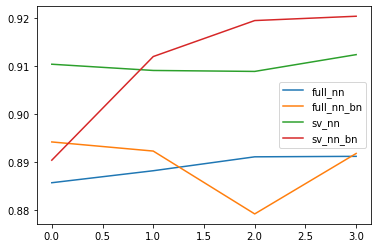

In [31]:
plt.plot(acc_full_nn,label='full_nn')
plt.plot(acc_full_nn_bn,label='full_nn_bn')
plt.plot(acc_sv_nn,label='sv_nn')
plt.plot(acc_sv_nn_bn,label='sv_nn_bn')
plt.legend()

In [56]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [57]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 14352), started 6:59:00 ago. (Use '!kill 14352' to kill it.)